In [1]:
# Packages
# in CMD - pip install seaborn
#        - pip install ttkthemes
#        - pip install pyqt5
# in Jupyter Notebook - !pip install ttkthemes

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from  matplotlib.ticker import PercentFormatter
import os
import warnings
warnings.filterwarnings(action='ignore')
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
from distutils.util import strtobool
from ttkthemes import ThemedTk
from PyQt5 import QtWidgets
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt5agg import NavigationToolbar2QT as NavigationToolbar
import pathlib
from pandastable import Table, TableModel
from sklearn.metrics import r2_score

In [2]:
# GUI

curr_options = ["None", "SINGLEPULSE", "PULSEDDYNAMIC", "PULSED"]
curr_amps = ["A", "mA"]
ordr = [1,2,3,4,5,6,7,8,9]
t_f = ['False', 'True']
incs = [1,2,5,10]
temps = ['$T_j (°C)$', '$T_c (°C)$']

def browse_button():
    # Allow user to select a directory and store it in global var
    # called folder_path
    global folder_path
    filename = filedialog.askdirectory()
    folder_path.set(filename)

root = ThemedTk(theme='adapta')
root.title("GUI")

# General Inputs
Label(root, text = "General Inputs", font=("Arial Bold", 12)).grid(row = 0, sticky = W)

Label(root, text = "Directory").grid(row = 1, sticky = W)
Label(root, text = "Filename(s) (Please have same first letters if multiple datasheets)").grid(row = 2, sticky = W)
Label(root, text = "Filetype").grid(row = 3, sticky = W)

# For Thermal Data
Label(root, text = "Set Current (A) (Thermal)").grid(row = 4, sticky = W)
Label(root, text = "Reference Temperature (°C) (Thermal)").grid(row = 5, sticky = W)

# For Electrical Data
Label(root, text = "Set Temperature (°C) (Electrical)").grid(row = 6, sticky = W)
Label(root, text = "Reference Current (A) (Electrical)").grid(row = 7, sticky = W)

# General Info
# Label(root, text = "Current Info (A or mA)").grid(row = 8, sticky = W)
Label(root, text = "Current Source Type (Select None if SP, CW, PWM1, and PWM2)").grid(row = 9, sticky = W)

# Output Info
Label(root, text = "Output Folder Location").grid(row = 10, sticky = W)
# Overwrite or no
Label(root, text = "Allow Overwriting Output Files?").grid(row = 11, sticky = W)

# Graph Options
Label(root, text = "Graph Options", font=("Arial Bold", 12)).grid(row = 12, sticky = W)

# Range for Thermal and Electrical
Label(root, text = "Temperature Range (°C)").grid(row = 13, sticky = W)
Label(root, text = "Current Range (A)").grid(row = 15, sticky = W)
# # of Bins
Label(root, text = "Increments for Temperature Ticks (Default - Increments of 10°C)").grid(row = 14, sticky = W)
Label(root, text = "Increments for Current Ticks (Default - Increments of 1A)").grid(row = 16, sticky = W)
# What order
Label(root, text = "Order (Ex: 1=Linear)").grid(row = 17, sticky = W)
# Show points or no
Label(root, text = "Show Points?").grid(row = 18, sticky = W)
# Export or no as excel worksheet
Label(root, text = "Export as Excel Worksheet?").grid(row = 19, sticky = W)
# Change Voltage numbers?
Label(root, text = "Change Voltage Numbers?").grid(row = 20, sticky = W)
# Tj vs Tc
Label(root, text = "Select Tj or Tc").grid(row = 21, sticky = W)

# Directory
folder_path = StringVar()
e0 = ttk.Entry(master=root,textvariable=folder_path)
#e0.insert(0, '')
dir_button = ttk.Button(text="Browse", command=browse_button)
# Filename(s)
e1 = ttk.Entry(root)
e1.insert(0, "CBM-50X-UV") # Change it to any filename you like
# Filetype
e2 = ttk.Entry(root)
e2.insert(0, ".xlsx")
# Temps & Amps
e3 = ttk.Entry(root)
e3.insert(0, 5)
e4 = ttk.Entry(root)
e4.insert(0, 40)
e5 = ttk.Entry(root)
e5.insert(0, 40)
e6 = ttk.Entry(root)
e6.insert(0, 5)

# Dropdown menu
# e7 = StringVar(root)
# e7.set(curr_amps[0])
# drops = OptionMenu(root,e7,*curr_amps)

# Dropdown menu
e8 = StringVar(root)
e8.set(curr_options[1])
drop = OptionMenu(root,e8,*curr_options)

# Output directory
e9 = ttk.Entry(root)
e9.insert(0, 'output')
# Dropdown menu
e10 = StringVar(root)
e10.set(t_f[0])
e10x = OptionMenu(root,e10,*t_f)

# Range for Thermal and Electrical
g1a = ttk.Entry(root)
g1a.insert(0, 20)
g1b = ttk.Entry(root)
g1b.insert(0, 160)
g2a = ttk.Entry(root)
g2a.insert(0, 0)
g2b = ttk.Entry(root)
g2b.insert(0, 10)

# Dropdown menu
g3 = StringVar(root)
g3.set(incs[3])
g3x = OptionMenu(root,g3,*incs)

# Dropdown menu
g4 = StringVar(root)
g4.set(incs[0])
g4x = OptionMenu(root,g4,*incs)

# Dropdown menu
g5 = StringVar(root)
g5.set(ordr[1])
g5x = OptionMenu(root,g5,*ordr)

# Dropdown menu
g6 = StringVar(root)
g6.set(t_f[0])
g6x = OptionMenu(root,g6,*t_f)

# Dropdown menu
g7 = StringVar(root)
g7.set(t_f[0])
g7x = OptionMenu(root,g7,*t_f)

# Dropdown menu
g8 = StringVar(root)
g8.set(t_f[0])
g8x = OptionMenu(root,g8,*t_f)

# Dropdown menu
g9 = StringVar(root)
g9.set(temps[0])
g9x = OptionMenu(root,g9,*temps)

e0.grid(row = 1, column = 1)
dir_button.grid(row=1, column=2)
e1.grid(row = 2, column = 1)
e2.grid(row = 3, column = 1)
e3.grid(row = 4, column = 1)
e4.grid(row = 5, column = 1)
e5.grid(row = 6, column = 1)
e6.grid(row = 7, column = 1)
# drops.grid(row = 8, column = 1)
drop.grid(row = 9, column = 1)
e9.grid(row = 10, column = 1)
e10x.grid(row = 11, column = 1)

g1a.grid(row = 13, column = 1)
g1b.grid(row = 13, column = 2)
g2a.grid(row = 15, column = 1)
g2b.grid(row = 15, column = 2)
g3x.grid(row = 14, column = 1)
g4x.grid(row = 16, column = 1)
g5x.grid(row = 17, column = 1)
g6x.grid(row = 18, column = 1)
g7x.grid(row = 19, column = 1)
g8x.grid(row = 20, column = 1)
g9x.grid(row = 21, column = 1)

def getInput():

    a = e0.get()
    b = e1.get()
    c = e2.get()
    d = float(e3.get())
    e = float(e4.get())
    f = float(e5.get())
    g = float(e6.get())
    # h = e7.get()
    i = e8.get()
    j = e9.get()
    k = e10.get()
    l = float(g1a.get())
    m = float(g1b.get())
    n = float(g2a.get())
    o = float(g2b.get())
    p = float(g3.get())
    q = float(g4.get())
    r = float(g5.get())
    s = g6.get()
    t = g7.get()
    u = g8.get()
    v = g9.get()
    root.destroy()
    global overall
    overall = [a,b,c,d,e,f,g,i,j,k,l,m,n,o,p,q,r,s,t,u,v]

root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)

ttk.Button(root, text = "Submit",
           command = getInput).grid(sticky = E, row = 50)
mainloop()

In [3]:
# Kill script if GUI has empty spots

import ctypes  # An included library with Python install.
def Mbox(title, text, style):
    return ctypes.windll.user32.MessageBoxW(0, text, title, style)

if '' in overall:
    Mbox('Error!', 'At least one entry in the GUI is empty - please fix', 0)
    sys.exit() # Kill script

In [4]:
# Input info
directory = pathlib.Path(overall[0])  # Provide the location of the excel files
name = overall[1]  #*RA* Provide the model a.k.a. everything before the temperature (prob change here)
file_type = overall[2]  # If reading in multiple files - they all have to be the same file type

# For thermal Data
set_current = overall[3]  # default: 6
ref_temp = overall[4]

# For electrical data
set_temp = overall[5]
ref_current = overall[6]  # default: 6

# General info
# current_info = overall[7] # A or mA
pulse_width = overall[7]  # typically single pulse

# Output info
output_f = overall[8]  # <- This is where the folder where you would like to put all the images of the graphs
                     # NOTE: Put the desired location of where the folder is located here
                     # If the file is in the same location as your directory, all you need to do is put the folder name here
                     # * NO backward slashes only forward

# Allow Overwriting or no? - Default=False
over = bool(strtobool(overall[9]))

In [5]:
# Select the columns you want from the excel spreadsheet

select_cols = ['Comment', 'Source mode - Currentsource',  'Source current - Currentsource / A', 'Current - Currentsource / A',
               'Voltage  - Currentsource / V', 'Radiometric / W', 'Photometric / lm', 'x - Color Coordinates', 
               'y - Color Coordinates', 'Peak Wavelength / nm', 'Centroid Wavelength / nm', 'Dominant Wavelength / nm', 
               'Set Temperature - LED870 / °C', 'Temperature - LED870 / °C', 
               'CCT / K', 'CRI', 'Red Effect / %', 'Width50 / nm']


# 'Last Dark Current / min', 'Signal Level / Counts', 'Signal Level / %', 'Scotopic / lm', 'UVA / W', 'UVB / W', 'UVC / W', 
# 'VIS / W', 'Tristimulus_X / lm', 'Tristimulus_Y / lm', 'Tristimulus_Z / lm', 'z - Color Coordinates', 'u - Color Coordinates', 
# 'v1960 - Color Coordinates', 'v1976 - Color Coordinates', 'Vis Effect / %'


# Original name for temperature column
cols_temp = 'Set Temperature - LED870 / °C'
# Original name for current column
cols_curr = 'Source current - Currentsource / A'
# Original name for pulse column
cols_puls = 'Source mode - Currentsource' # Don't add pulse column into renamed area as it gets dropped

# Renamed name of temperature and current column
xt = overall[20]
xc = '$I_f$ (A)'

# Add columns here for any calculations
# Calculated columns will be appended to the dataframe
#column_d = ['Voltage  - Currentsource / V', 'x - Color Coordinates', 'y - Color Coordinates', 'Peak Wavelength / nm', 
#            'Dominant Wavelength / nm', 'Centroid Wavelength / nm', 'CRI', 'Red Effect / %', 'Width50 / nm'] # Change (-) columns
#column_p = ['Radiometric / W', 'Photometric / lm'] # Relative (%) columns

# Here: rename all selected columns & calculated columns - don't forget calculated columns are added towards the end
# Change columns first then relative columns

column_rn = ['Serial Number',  xt, xc, 'Measured Current (A)', '$V_f$ (V)',
             'Radiometric Flux', 'Luminous Flux', 'CIEx', 'CIEy', 'Peak Wavelength (λp)', 
             'Centroid Wavelength (λcen)', 'Dominant Wavelength (λd)', 'Thermistor Temperature (°C)', 'CCT / K', 'CRI', 'R9', 'FWHM',
             '$ΔV_f$ (V)', 'Δ CIEx', 'Δ CIEy', '$Δλ_p (nm)$', 'Δ Centroid Wavelength (λcen)', 'Δ Dominant Wavelength (λd)', 
             'Δ CRI', 'Δ R 9', 'Δ FWHM', 'Relative Radiometric Flux (%)', 'Relative Luminous Flux (%)']


# 'Last Dark Current (min)', 'Signal Level (counts)', 'Signal Level (%)', 'Scotopic Luminous Flux', 'UVA (W)', 'UVB (W)', 
# 'UVC (W)', 'VIS (W)', 'TRIx', 'TRIy', 'TRIz', 'CIEz', 'CIEu', 'v1960', 'v1976', 'Width (nm)', 'CRI', 'Red Effect (%)', 
# 'Vis Effect (%)', 'CCT',

In [6]:
# IMPORTANT - OUTPUT
# Select columns here from the *RENAMED COLUMNS list above* - this is what outputs the graphs
# Add more columns & titles here if necessary

y1 = '$V_f$ (V)'
y1n = 'Vf'
y1tt = 'Vf vs. ' + xt + ' \n Vf(' + xt + ') ' + str(pulse_width).title() + ' If = ' + str(set_current) + 'A'
y1te = 'Vf vs. lf \n Vf(lf) ' + str(pulse_width).title() + ' ' + xt + ' = ' + str(set_temp) + '°C'

y2 = '$ΔV_f$ (V)'
y2n = 'd_Vf'
y2tt = 'ΔVf vs. ' + xt + ' \n ΔVf = V(' + xt + ') - V(' + str(ref_temp) + '¡C) ' + str(pulse_width).title() + ' If = ' + str(set_current) + 'A'
y2te = 'ΔVf vs. lf \n ΔVf = V(lf) - V(' + str(ref_current) + 'A) ' + str(pulse_width).title() + ' ' + xt + ' = ' + str(set_temp) + '°C'

y3 = 'Relative Radiometric Flux (%)'
y3n = 'Radio'
y3tt = 'Relative Radiometric Flux (%) vs. ' + xt + ' \n φv/φv(' + str(ref_temp) + '¡C) ' + str(pulse_width).title() + ' If = ' + str(set_current) + 'A'
y3te = 'Relative Radiometric Flux (%) vs. lf \n φv/φv(' + str(ref_current) + 'A) ' + str(pulse_width).title() + ' ' + xt + ' = ' + str(set_temp) + '°C'

y4 = 'Relative Luminous Flux (%)'
y4n = 'Lumin'
y4tt = 'Relative Luminous Flux (%) vs. ' + xt + ' \n φv/φv(' + str(ref_temp) + '¡C) ' + str(pulse_width).title() + ' If = ' + str(set_current) + 'A'
y4te = 'Relative Luminous Flux (%) vs. lf \n φv/φv(' + str(ref_current) + 'A) ' + str(pulse_width).title() + ' ' + xt + ' = ' + str(set_temp) + '°C'

y5 = '$Δλ_p (nm)$'
y5n = 'd_Lpk'
y5tt = 'Peak Wavelength'
y5te = 'Peak Wavelength'

y6 = 'Δ Dominant Wavelength (λd)'
y6n = 'd_Ldom'
y6tt = 'Dominant Wavelength'
y6te = 'Dominant Wavelength'

y7 = 'Δ Centroid Wavelength (λcen)'
y7n = 'd_Lcen'
y7tt = 'Cen Wavelength'
y7te = 'Cen Wavelength'

y8 = 'Δ CRI'
y8n = 'd_CRI'
y8tt = 'CRI'
y8te = 'CRI'

y9 = 'Δ R 9'
y9n = 'd_R9'
y9tt = 'R 9'
y9te = 'R 9'

y10 = 'Δ FWHM'
y10n = 'd_FWHM'
y10tt = 'FWHM'
y10te = 'FWHM'

# Show all of y variables (number of columns that we would like outputs for), only change if removing or adding columns
y_n = [y1,y2,y3,y4,y5,y6,y7,y8,y9,y10]
y_nn = y_n.copy()
y_fn = [y1n,y2n,y3n,y4n,y5n,y6n,y7n,y8n,y9n,y10n]
y_nt = [y1tt,y2tt,y3tt,y4tt,y5tt,y6tt,y7tt,y8tt,y9tt,y10tt]
y_ne = [y1te,y2te,y3te,y4te,y5te,y6te,y7te,y8te,y9te,y10te]

row_size = 5
column_size = 2
ax_n = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1), (3,0), (3,1), (4,0), (4,1)] # the axes for the subplots

# CIEx & y column names here:
cix = 'Δ CIEx'
cixn = 'd_CIEx'
ciy = 'Δ CIEy'
ciyn = 'd_CIEy'

# ALSO - change x range if necessary
# Thermal by default is 20-90 Celsius
xt1 = overall[10]
xt2 = overall[11]

# Electrical by default is 0-10 Amps
xe1 = overall[12]
xe2 = overall[13]

# Number of bins for therm and elect
t_bins = overall[14]
e_bins = overall[15]

# Graph order number - 1 = linear, 2 = quadratic, 3 = cubic, etc.
ord_num = overall[16]

# Show points or no?
show_pt = bool(strtobool(overall[17]))

# Export as Excel Worksheet or no?
exp = bool(strtobool(overall[18]))

# Change Voltage numbers or no?
volt = bool(strtobool(overall[19]))

In [7]:
# Change directory
os.chdir(directory)
pathlib.Path.cwd()

WindowsPath('C:/Users/Chelton Kuang/Documents')

In [8]:
# Check whether the specified path exists or not
isExist = os.path.exists(output_f)

if not isExist:
  
  # Create output dir if doesn't exist
  os.makedirs(output_f)
  Mbox("Create output dir", "The output directory has been created: " + output_f, 0)

In [9]:
# Identifies all filenames in the directory

filesnames = os.listdir()
filesnames = [f for f in filesnames if (f.startswith(name) and f.lower().endswith(file_type))]

# Read in excel files as dataframe

# Here we concat similarly named files together - nice for putting together different test datasets on the same chips

df = pd.concat(map(pd.read_excel, filesnames)) # Change to read_csv for csv files
df

,Number,Comment,Integration Time / ms,Averages,Filter,Serial Number,CCD Temperature,DC Temperature,Last Dark Current / min,Signal Level / Counts,...,Zhaga flux category,Zhaga book 1 flux category,Desktop,Tolerance Time - LED870 / s,Voltage - LED870 / V,Current - LED870 / A,Currentsource,Control mode - Currentsource,Compliance - Currentsource / V,Voltage range - Currentsource / V
0,1,112165547,15,1,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,0.4,1631,...,NaN,NaN,C:\Users\TestLab\Desktop\Pre-Set Test Programs...,3,-2.13,-0.78,Vektrex_SN3800-1462,Triggered,20,20
1,3,112165547,15,1,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,1.7,4500,...,NaN,NaN,C:\Users\TestLab\Desktop\Pre-Set Test Programs...,3,-2.19,-0.83,Vektrex_SN3800-1462,Triggered,20,20
2,4,112165547,15,1,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,3.4,5880,...,NaN,NaN,C:\Users\TestLab\Desktop\Pre-Set Test Programs...,3,-2.09,-0.79,Vektrex_SN3800-1462,Triggered,20,20
3,5,112165547,15,1,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,3.7,8456,...,NaN,NaN,C:\Users\TestLab\Desktop\Pre-Set Test Programs...,3,-2.11,-0.78,Vektrex_SN3800-1462,Triggered,20,20
4,6,112165547,15,1,OD2,026214418;18-0762,-10.18 °C,-10.61 °C,4.4,10816,...,NaN,NaN,C:\Users\TestLab\Desktop\Pre-Set Test Programs...,3,-2.06,-0.74,Vektrex_SN3800-1462,Triggered,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,8,112165512,15,1,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,214.5,7093,...,NaN,NaN,C:\Users\TestLab\Desktop\Pre-Set Test Programs...,3,-28.61,-7.12,Vektrex_SN3800-1462,Triggered,20,20
247,9,112165512,15,1,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,214.8,7555,...,NaN,NaN,C:\Users\TestLab\Desktop\Pre-Set Test Programs...,3,-28.67,-7.13,Vektrex_SN3800-1462,Triggered,20,20
248,10,112165512,15,1,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,215.1,7841,...,NaN,NaN,C:\Users\TestLab\Desktop\Pre-Set Test Programs...,3,-28.83,-7.15,Vektrex_SN3800-1462,Triggered,20,20
249,11,112165512,15,1,OD2,026214418;18-0762,-10.61 °C,-10.61 °C,215.3,8040,...,NaN,NaN,C:\Users\TestLab\Desktop\Pre-Set Test Programs...,3,-28.67,-7.11,Vektrex_SN3800-1462,Triggered,20,20


In [10]:
# Double check if imported worksheets are not empty - if empty, script is killed
if df.empty:
    Mbox('Error!', 'Imported worksheets are empty', 0)
    sys.exit() # Kill script

In [11]:
# Double check if expected columns are not missing

try:
    df = df[select_cols]
except KeyError as e:
    Mbox('Error!', repr(e) + '\n Fix then Restart & Run All', 0)
    sys.exit() # Kill script

In [12]:
# Select columns needed - ADD OR REMOVE AS NEEDED

df['Comment'] = df['Comment'].astype(str)
#df = df[df['Set Temperature - LED870 / °C'] != 45]

# if SP, CW, PWM1, and PWM2 - dropdown menu, else skip

if pulse_width == "None":
    df['Comment Spec'] = df['Comment'].str.split('-').str.get(0)
    first_column = df.pop('Comment Spec')
    df.insert(0, 'Comment Spec', first_column)
    #df = df.reset_index()
    nm = list(df['Comment Spec'].unique())

    root = ThemedTk(theme='arc')
    root.title("GUI for SP, CW, PWM1, or PWM2 Selection")

    Label(root, text = "Select SP, CW, PWM1, or PWM2").grid(row = 1, sticky = W)

    e7 = StringVar(root)
    e7.set(nm[0])
    drop = ttk.OptionMenu(root,e7,*nm)

    drop.grid(row = 2)
    
    def kill():
        global h
        h = e7.get()
        root.destroy()
    
    ttk.Button(root, text = "Submit",
           command = kill).grid(row = 50)

    root.mainloop()
    
    df = df[df['Comment Spec'] == h]
    
    df = df.drop(['Comment Spec'], axis=1)
else:
    df = df[df[cols_puls] == pulse_width]

df = df.drop([cols_puls], axis=1)
df = df.dropna()
#df

In [13]:
# Check for any zeros

xdl = []
xd = df[(df.iloc[:,1:5] == 0).any(axis=1)]
for i in xd['Comment'].unique():
    xdl.append(i)

if not xd.empty:
    class TestApp(Frame):
        """Basic test frame for the table"""
        def __init__(self, parent=None):
            self.parent = parent
            Frame.__init__(self)
            self.main = self.master
            self.main.geometry('600x400+200+100')
            self.main.title('Observations with zeros which will be dropped')
            f = Frame(self.main)
            f.pack(fill=BOTH,expand=1)
            self.table = pt = Table(f, dataframe=xd,
                                    showtoolbar=True, showstatusbar=True)
            pt.show()
            return

    app = TestApp()
    #launch the app
    app.mainloop()
    #Mbox('Warning!', 'Please double-check these serial numbers - ' + str(xdl) + '\n The rows will be dropped.', 0)

In [14]:
# Drop any rows that have 0s
indices = df.loc[(df.iloc[:,1:5] == 0).any(axis=1), :].index.tolist()
for ind in indices:
    df = df.drop(ind)
    
# Check if dataframe is empty
if df.empty:
    Mbox('Error!', 'The dataframe is empty', 0)
    sys.exit() # Kill script

In [15]:
# If Voltage above 200v, point out row and drop

df_200v = df[df['Voltage  - Currentsource / V'] >= 200]
df = df[df['Voltage  - Currentsource / V'] < 200]

if not df_200v.empty:
    class TestApp(Frame):
        """Basic test frame for the table"""
        def __init__(self, parent=None):
            self.parent = parent
            Frame.__init__(self)
            self.main = self.master
            self.main.geometry('600x400+200+100')
            self.main.title('Observations above 200v which will be dropped')
            f = Frame(self.main)
            f.pack(fill=BOTH,expand=1)
            self.table = pt = Table(f, dataframe=df_200v,
                                    showtoolbar=True, showstatusbar=True)
            pt.show()
            return

    app = TestApp()
    #launch the app
    app.mainloop()
    #Mbox('Warning!', 'At least one observation has voltage above 200v \n they will be dropped', 0)

In [16]:
# Optionally - input box for raising or lowering Voltage value

if volt == True:
    root = ThemedTk(theme='arc')
    root.title("GUI for Changing Voltage Value")

    Label(root, text = "Input how much you would like to change voltage by (ex: Insert -3 to lower Voltage by 3)").grid(row = 1, sticky = W)

    e1 = ttk.Entry(root)
    e1.insert(0, 0)
    e1.grid(row = 2, sticky = W)
    
    def kill():
        global g
        g = e1.get()
        root.destroy()
    
    ttk.Button(root, text = "Submit",
           command = kill).grid(row = 50)

    root.mainloop()
    
    g = float(g)
    df['Voltage  - Currentsource / V'] = df['Voltage  - Currentsource / V'] + g
else:
    pass

In [17]:
# Get all unique SNs
df["Comment"] = df["Comment"].astype(str) # Change to string
sn_unique = df['Comment'].unique()
sn_unique.sort()
sn_uniq = list(sn_unique)
sn_uni = list(sn_unique)

In [18]:
# Pop-up menu for filtering by Serial Number if needed

root = ThemedTk(theme='arc')
root.title("GUI")

# General Inputs
ttk.Label(root, text = "Filtering by Serial Number", font=("Arial Bold", 12)).pack(anchor = 'w')

sn_list = []

for x in range(len(sn_unique)):
    sn_uniq[x] = IntVar()
    l = Checkbutton(root, text=sn_unique[x], variable=sn_uniq[x], font=("Arial", 8)) # Change font size if too many vars
    l.select()
    l.pack(anchor = 'w')
    
def kill():
    for x in range(len(sn_unique)):
         sn_list.append(sn_uniq[x].get())
    root.destroy()
    
ttk.Button(root, text = "OK", command = kill).pack()

root.mainloop()

In [19]:
# Append the unique array and list to filter

sn_df = pd.DataFrame(
    {'SN': sn_uni,
     'Select': sn_list
    })
sn_df = sn_df[sn_df['Select']==1]  # Select only 1's

In [20]:
# Take the SNs selected
df = df[df['Comment'].isin(sn_df['SN'])]
#df

In [21]:
# Just in case - converts to numeric
cols = df.columns.drop('Comment')
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [22]:
# Get groupby means for normalization
df = df.groupby(['Comment', 'Set Temperature - LED870 / °C', 'Source current - Currentsource / A']).mean().reset_index()
#df

In [23]:
# Filtering for thermal data and electrical data (identify set amps / temp)

# Set Amps = 6 A (Thermal Data)
therm = df[df[cols_curr] == set_current]
therm = therm.reset_index(drop=True)

# Set Temp = 40 C (Electrical Data)
elect = df[df[cols_temp] == set_temp]
elect = elect.reset_index(drop=True)

# If set temp/current doesn't exist, kill script and show error
if therm.empty or elect.empty:
    Mbox('Error!', 'Please double-check if selected set temp/current exists in spreadsheet' + '\n Then Restart & Run All', 0)
    sys.exit() # Kill script

#therm

In [24]:
# Create column 'mean' as baseline

# Thermal
thermx = therm[therm[cols_temp] == ref_temp]
#thermx.loc['mean'] = thermx.mean()
#last_row = thermx.tail(1)
#therm = therm.append(last_row)
#therm.tail()

In [25]:
# Duplicate therm data and filter

therm2 = therm
therm = therm.drop(['Set Temperature - LED870 / °C', 'Source current - Currentsource / A', 'Current - Currentsource / A', 
                   'Temperature - LED870 / °C', 'CCT / K'], axis=1)
thermx = thermx.drop(['Set Temperature - LED870 / °C', 'Source current - Currentsource / A', 'Current - Currentsource / A', 
                   'Temperature - LED870 / °C', 'CCT / K'], axis=1)

In [26]:
# Calculations

test = (therm.set_index('Comment').iloc[:,[0,3,4,5,6,7,8,9,10]]-thermx.set_index('Comment').iloc[:,[0,3,4,5,6,7,8,9,10]]
        .reindex(therm['Comment'])).dropna(axis=0).reset_index()
test2 = (therm.set_index('Comment').iloc[:,[1,2]] / thermx.set_index('Comment').iloc[:,[1,2]]
                .reindex(therm['Comment'])).dropna(axis=0).reset_index()
test2 = test2[test2.select_dtypes(include=['number']).columns] * 100
thermz = pd.concat([therm2, test.iloc[:,1:], test2], axis=1)

In [27]:
# Electrical

electx = elect[elect[cols_curr] == ref_current]
#electx.loc['mean'] = electx.mean()
#last_row = electx.tail(1)
#elect = elect.append(last_row)
#elect.tail()

In [28]:
# Duplicate therm data and filter

elect2 = elect
elect = elect.drop(['Set Temperature - LED870 / °C', 'Source current - Currentsource / A', 'Current - Currentsource / A', 
                   'Temperature - LED870 / °C', 'CCT / K'], axis=1)
electx = electx.drop(['Set Temperature - LED870 / °C', 'Source current - Currentsource / A', 'Current - Currentsource / A', 
                   'Temperature - LED870 / °C', 'CCT / K'], axis=1)

In [29]:
# Calculations

test = (elect.set_index('Comment').iloc[:,[0,3,4,5,6,7,8,9,10]]-electx.set_index('Comment').iloc[:,[0,3,4,5,6,7,8,9,10]]
        .reindex(elect['Comment'])).dropna(axis=0).reset_index()
test2 = (elect.set_index('Comment').iloc[:,[1,2]] / electx.set_index('Comment').iloc[:,[1,2]]
                .reindex(elect['Comment'])).dropna(axis=0).reset_index()
test2 = test2[test2.select_dtypes(include=['number']).columns] * 100
electz = pd.concat([elect2, test.iloc[:,1:], test2], axis=1)

In [30]:
# If reference temp/current doesn't exist, kill script and show error
if thermx.empty or electx.empty:
    Mbox('Error!', 'Please double-check if selected reference temp/current exists in spreadsheet' + '\n Then Restart & Run All', 0)
    sys.exit() # Kill script

In [31]:
thermz.columns = column_rn
electz.columns = column_rn

In [32]:
# For horizontal line on graph
thermz_m = thermz[thermz[xt] == ref_temp].iloc[0]
electz_m = electz[electz[xc] == ref_current].iloc[0]

In [33]:
# Change to string
thermz['Serial Number'] = thermz['Serial Number'].astype(str)
electz['Serial Number'] = electz['Serial Number'].astype(str)

In [34]:
# Add in 0 for Radiant Power and Luminous Flux to force them to zero - COMMENT OUT IF NOT NEEDED
'''
n = df['Source current - Currentsource / A'].max()*0.01
dfa = pd.DataFrame({'$l_f$ (A)': n, 'Radiometric Flux': 0, 'Luminous Flux': 0, 'Relative Radiometric Flux (%)': 0, 'Relative Luminous Flux (%)': 0},index = range(1))
dfa = pd.concat([dfa]*5, ignore_index=True)
elect = elect.append(dfa, ignore_index = True)
''';

In [35]:
# Function for popup window
class ScrollableWindow(QtWidgets.QMainWindow):
    def __init__(self, fig):
        self.qapp = QtWidgets.QApplication([])

        QtWidgets.QMainWindow.__init__(self)
        title = name + ' - By Serial Number'
        self.setWindowTitle(title)
        self.widget = QtWidgets.QWidget()
        self.setCentralWidget(self.widget)
        self.widget.setLayout(QtWidgets.QVBoxLayout())
        self.widget.layout().setContentsMargins(0,0,0,0)
        self.widget.layout().setSpacing(0)

        self.fig = fig
        self.canvas = FigureCanvas(self.fig)
        self.canvas.draw()
        self.scroll = QtWidgets.QScrollArea(self.widget)
        self.scroll.setWidget(self.canvas)

        self.nav = NavigationToolbar(self.canvas, self.widget)
        self.widget.layout().addWidget(self.nav)
        self.widget.layout().addWidget(self.scroll)

        self.show()
        self.qapp.exec_()

In [36]:
# Function for version checking saved images for pngs

def version_png(fname):
    i = 0
    filename = fname
    while os.path.exists('{}{:d}.png'.format(filename, i)):
        i += 1
    f.savefig('{}{:d}.png'.format(filename, i))

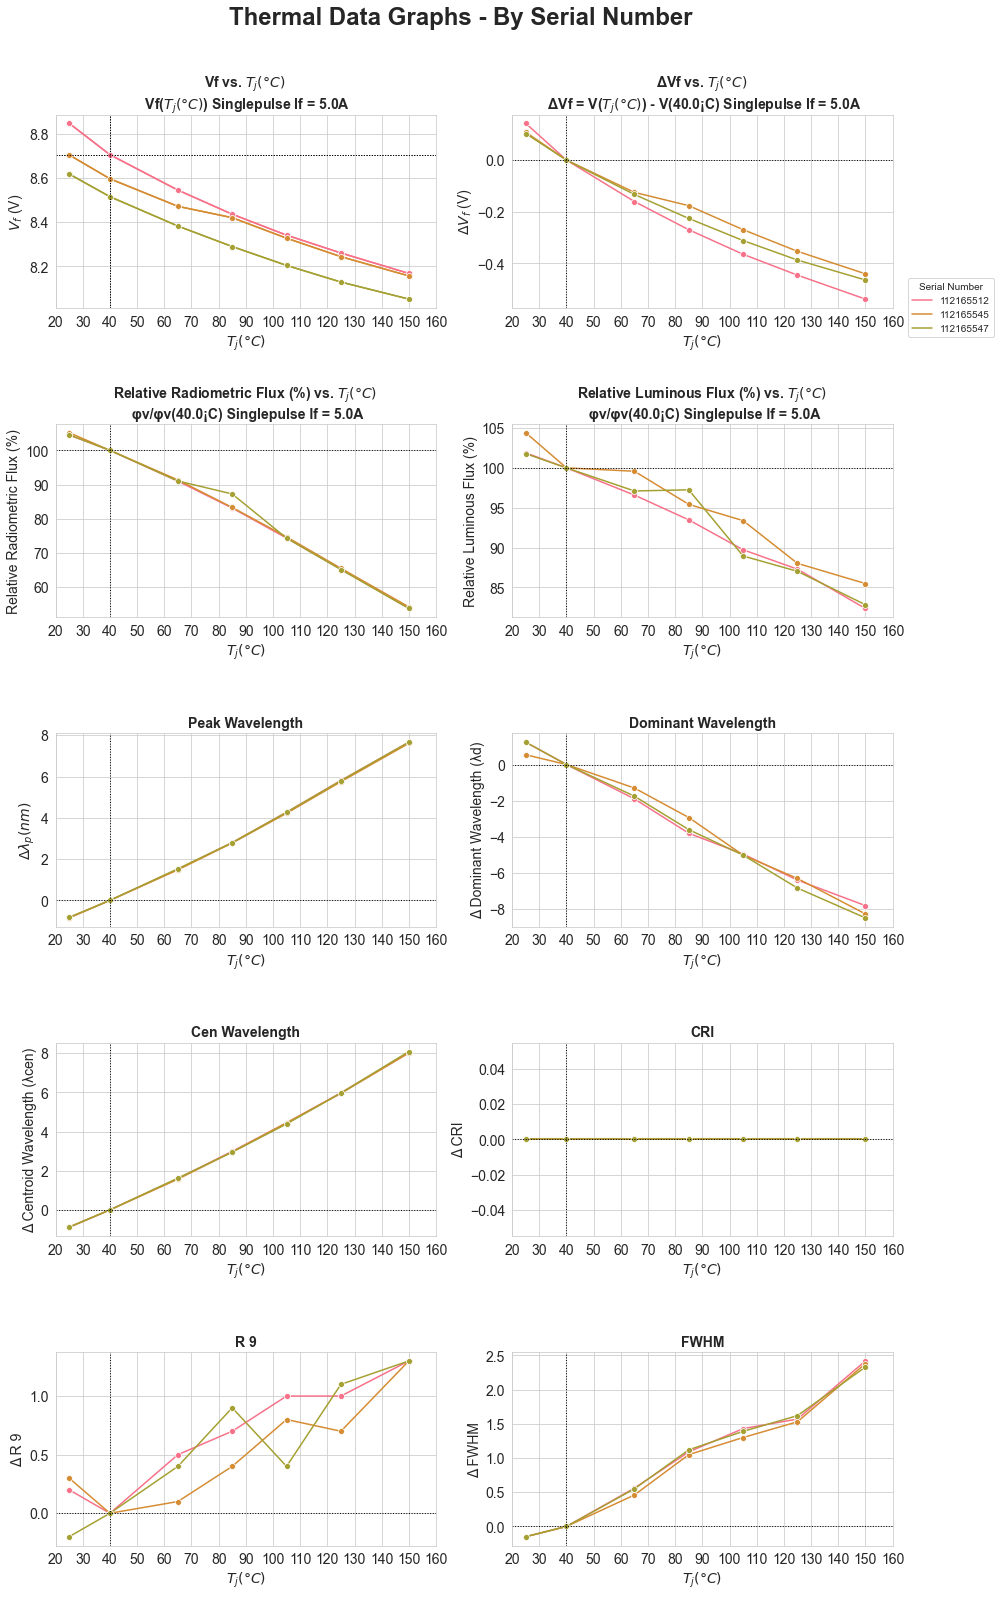

In [37]:
# Thermal - By Serial Number

# To change font specifically - fontname = 'provide font name'
# To change font globally - plt.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Myriad Pro']})

plt.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Myriad Pro']})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

sns.set_style("whitegrid")
f, axes = plt.subplots(row_size, column_size, figsize = (15,25))
plt.subplots_adjust(hspace = 0.6)
plt.subplots_adjust(top=0.92)
f.suptitle('Thermal Data Graphs - By Serial Number', fontsize = 24, fontweight = 'bold')

# Change palette here
sns.set_palette("husl", 9)

for (a,b,d) in zip(y_n, y_nt, ax_n):

    c = sns.lineplot(ax=axes[d], x=xt, y=a, hue="Serial Number", data=thermz, ci=False, legend=False, marker='o')

    axes[d].set_title(b, fontweight = 'bold', fontsize = 14)
    c.set(xlim=(xt1, xt2))
    c.set(xticks=np.arange(xt1, xt2+0.01, t_bins))
    c.axhline(thermz_m[a] ,ls='dotted', color='black', linewidth=1)
    c.axvline(ref_temp, ls='dotted', color='black', linewidth=1)
 
 # Re-added c1 for legend
c1 = sns.lineplot(ax=axes[0,0], x=xt, y=y1, hue="Serial Number", data=thermz, ci=False, marker='o')

axes[0,0].set_title(y1tt, fontweight = 'bold', fontsize = 14)
c1.set(xlim=(xt1, xt2))
c1.set(xticks=np.arange(xt1, xt2+0.01, t_bins))
c1.axhline(thermz_m[y1] ,ls='dotted', color='black', linewidth=1)
c1.axvline(ref_temp, ls='dotted', color='black', linewidth=1)
c1.legend(loc='right', bbox_to_anchor=(2.48, 0), ncol=1).set_title('Serial Number') # , prop={'size': 6} <- increase legend size
c1.set_zorder(1)

In [38]:
# Change to version #

if over == False:
    if pulse_width == "None":
        fname = output_f + '/' + name + '_' + h + '_sn_therm_'
        version_png(fname)
    else:
        fname = output_f + '/' + name + '_' + pulse_width + '_sn_therm_'
        version_png(fname)
else:
    if pulse_width == "None":
        f.savefig(output_f + '/' + name + '_' + h + '_sn_therm.png')
    else:
        f.savefig(output_f + '/' + name + '_' + pulse_width + '_sn_therm.png')

In [39]:
# Individual Thermal Graphs - By Serial Number
'''
for (a,b,d) in zip(y_n, y_nt, ax_n):

    c = sns.lmplot(x=xt, y=a, hue="Serial Number", data=thermz, ci=False, legend=True, scatter=show_pt, order=ord_num, 
                    aspect = 1.8)

    plt.title(b, fontweight = 'bold', fontsize = 14)
    c.set(xlim=(xt1, xt2))
    c.set(xticks=np.arange(xt1, xt2+0.01, t_bins))
    plt.axhline(thermz_m[a] ,ls='dotted', color='black', linewidth=1)
    plt.axvline(ref_temp, ls='dotted', color='black', linewidth=1)
    plt.axvline(xt2, color='0.8')
''';

In [40]:
# Individual Thermal Graphs - By Serial Number (Bokeh package)
import bokeh.plotting as bp
import bokeh.palettes as bpa
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.models import Legend

plots = [figure() for i in range(len(y_n))]

gby = thermz.groupby('Serial Number')

for (a,b,c) in zip(y_n, y_nt, range(len(y_n))):
    plots[c] = bp.figure(title=b, width=900, height=500)
    plots[c].xaxis.axis_label = xt
    plots[c].yaxis.axis_label = a

    x = [list(sdf[xt]) for i, sdf in gby]
    y = [list(sdf[a]) for i, sdf in gby]
    source = ColumnDataSource(dict( x = x, 
                                y = y, 
                                legend = thermz['Serial Number'].unique(), 
                                color = bpa.viridis(len(thermz['Serial Number'].unique()))))
    TOOLTIPS = [
        ("Serial Number, Temp (°𝐶), Variable", "@legend, $data_x, $data_y")
        ]
    
    plots[c].add_layout(Legend(),'right')
    plots[c].multi_line('x', 'y', legend_field = 'legend', line_color = 'color', line_width = 2, source = source)
    # Add the HoverTool to the figure
    plots[c].add_tools(HoverTool(tooltips=TOOLTIPS, mode='vline'))
    
bp.show(gridplot(children = plots, ncols = 2))

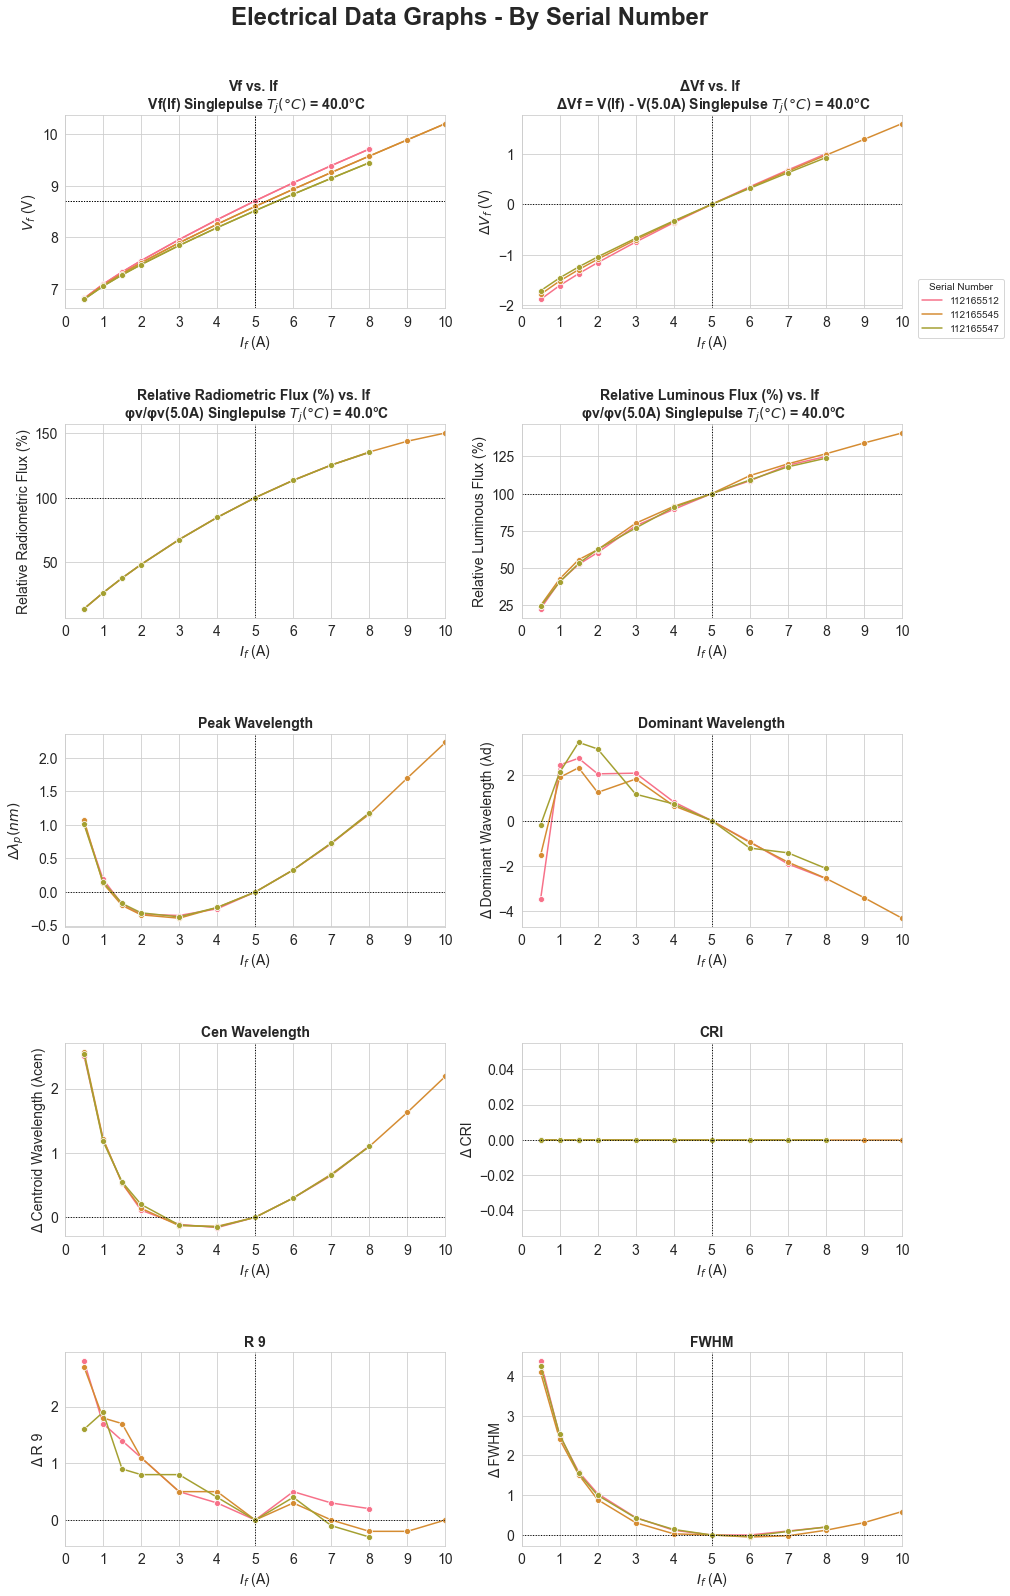

In [41]:
# Electrical - By Serial Number

# To change font specifically - fontname = 'provide font name'
# To change font globally - plt.rcParams.update({'font.family':'sans-serif'})

sns.set_style("whitegrid")
f, axes = plt.subplots(row_size, column_size, figsize = (15,25))
plt.subplots_adjust(hspace = 0.6)
plt.subplots_adjust(top=0.92)
f.suptitle('Electrical Data Graphs - By Serial Number', fontsize = 24, fontweight = 'bold')

# Change palette here
sns.set_palette("husl", 9)

for (a,b,d) in zip(y_n, y_ne, ax_n):

    c = sns.lineplot(ax=axes[d], x=xc, y=a, hue="Serial Number", data=electz, ci=False, legend=False, marker='o')

    axes[d].set_title(b, fontweight = 'bold', fontsize = 14)
    c.set(xlim=(xe1, xe2))
    c.set(xticks=np.arange(xe1, xe2+0.01, e_bins))
    c.axhline(electz_m[a] ,ls='dotted', color='black', linewidth=1)
    c.axvline(ref_current, ls='dotted', color='black', linewidth=1)
 
 # Re-added c1 for legend
c1 = sns.lineplot(ax=axes[0,0], x=xc, y=y1, hue="Serial Number", data=electz, ci=False, marker='o')

axes[0,0].set_title(y1te, fontweight = 'bold', fontsize = 14)
c1.set(xlim=(xe1, xe2))
c1.set(xticks=np.arange(xe1, xe2+0.01, e_bins))
c1.axhline(electz_m[y1] ,ls='dotted', color='black', linewidth=1)
c1.axvline(ref_current, ls='dotted', color='black', linewidth=1)
c1.legend(loc='right', bbox_to_anchor=(2.48, 0), ncol=1).set_title('Serial Number')
c1.set_zorder(1)

In [42]:
if over == False:
    if pulse_width == "None":
        fname = output_f + '/' + name + '_' + h + '_sn_elect_'
        version_png(fname)
    else:
        fname = output_f + '/' + name + '_' + pulse_width + '_sn_elect_'
        version_png(fname)
else:
    if pulse_width == "None":
        f.savefig(output_f + '/' + name + '_' + h + '_sn_elect.png')
    else:
        f.savefig(output_f + '/' + name + '_' + pulse_width + '_sn_elect.png')

In [43]:
# Individual Electrical Graphs - By Serial Number
'''
for (a,b,d) in zip(y_n, y_ne, ax_n):

    c = sns.lmplot(x=xc, y=a, hue="Serial Number", data=electz, ci=False, legend=True, scatter=show_pt, order=ord_num, 
                    aspect = 1.8)

    plt.title(b, fontweight = 'bold', fontsize = 14)
    c.set(xlim=(xe1, xe2))
    c.set(xticks=np.arange(xe1, xe2+0.01, e_bins))
    plt.axhline(electz_m[a] ,ls='dotted', color='black', linewidth=1)
    plt.axvline(ref_current, ls='dotted', color='black', linewidth=1)
    plt.axvline(xe2, color='0.8')
''';

In [44]:
# Individual Electrical Graphs - By Serial Number (Bokeh package)

plots = [figure() for i in range(len(y_n))]

gby = electz.groupby('Serial Number')

for (a,b,c) in zip(y_n, y_nt, range(len(y_n))):
    plots[c] = bp.figure(title=b, width=900, height=500)
    plots[c].xaxis.axis_label = xc
    plots[c].yaxis.axis_label = a

    x = [list(sdf[xc]) for i, sdf in gby]
    y = [list(sdf[a]) for i, sdf in gby]
    source = ColumnDataSource(dict( x = x, 
                                y = y, 
                                legend = electz['Serial Number'].unique(), 
                                color = bpa.viridis(len(electz['Serial Number'].unique()))))
    TOOLTIPS = [
        ("Serial Number, Temp (°𝐶), Variable", "@legend, $data_x, $data_y")
        ]
    
    plots[c].add_layout(Legend(),'right')
    plots[c].multi_line('x', 'y', legend_field = 'legend', line_color = 'color', line_width = 2, source = source)
    # Add the HoverTool to the figure
    plots[c].add_tools(HoverTool(tooltips=TOOLTIPS, mode='vline'))
    
bp.show(gridplot(children = plots, ncols = 2))

In [45]:
# Function for version checking saved images for pdfs

def version_pdf(fname):
    i = 0
    filename = fname
    while os.path.exists('{}{:d}.pdf'.format(filename, i)):
        i += 1
    plt.savefig('{}{:d}.pdf'.format(filename, i), dpi=1000, bbox_inches='tight')

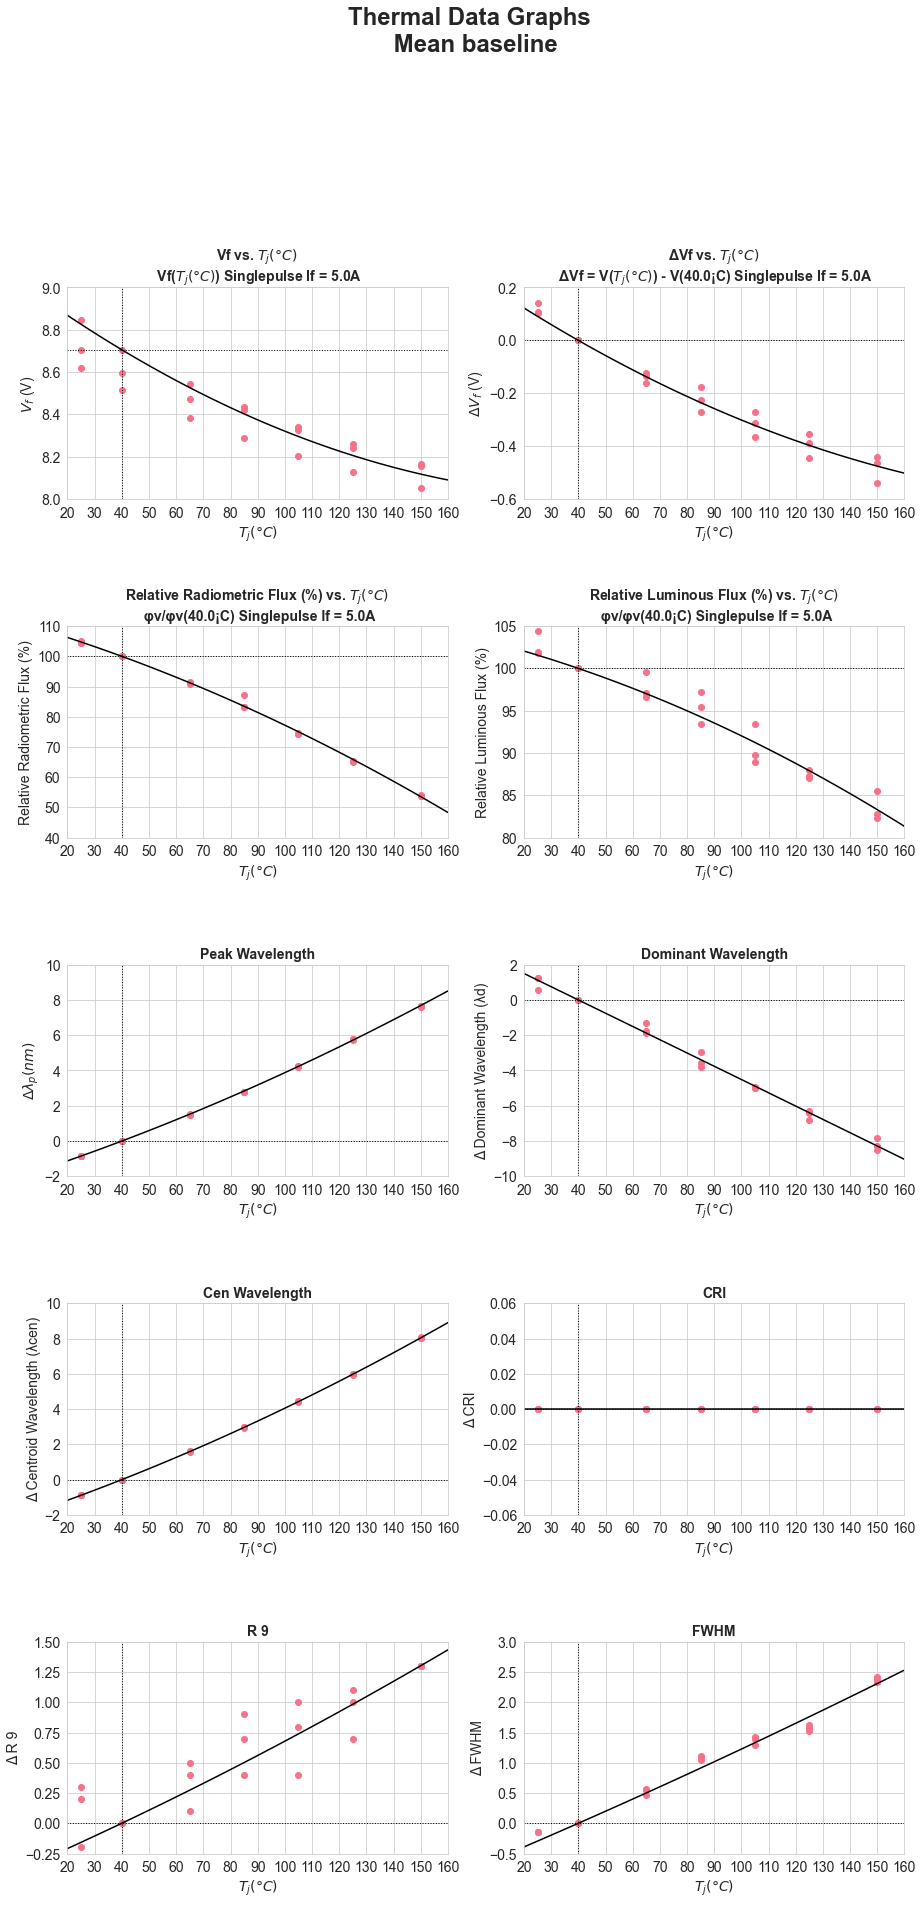

In [46]:
# Just Thermal

from scipy import optimize

# To change font specifically - fontname = 'provide font name'
# To change font globally - plt.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Myriad Pro']})

plt.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Myriad Pro']})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)
plt.rcParams['axes.autolimit_mode'] = 'round_numbers' # This avoids showing partial increments
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

sns.set_style("whitegrid")
f, axes = plt.subplots(row_size, column_size, figsize = (15,30))
plt.subplots_adjust(hspace = 0.6)
plt.subplots_adjust(top=0.85)
f.suptitle('Thermal Data Graphs \n Mean baseline', fontsize = 24, fontweight = 'bold')

index = thermz.index
condition = thermz[xt] == ref_temp
ref_ind = index[condition]

N = thermz[thermz.columns[0]].count()

sigma =np.ones(N)
sigma[[ref_ind[0]]] = 0.01

def f(x, *p):
    return np.poly1d(p)(x)

for (a,b,d) in zip(y_n, y_nt, ax_n):
    x = thermz[xt]
    y = thermz[a]
    p1, _ = optimize.curve_fit(f, x, y, (0, 0, 0), sigma=sigma) # If want to change order, add more zeroes

    x2 = np.linspace(xt1, xt2, 100)
    y2 = np.poly1d(p1)(x2)
    axes[d].set_title(b, fontweight = 'bold', fontsize = 14)
    #if show_pt == True:
    axes[d].plot(x, y, "o")
    axes[d].plot(x2, f(x2, *p1), "black", label=u"Fixed point")
    axes[d].set(xlabel=xt, ylabel=a)
    axes[d].set(xlim=(xt1, xt2))
    axes[d].set(xticks=np.arange(xt1, xt2+0.01, t_bins))
    axes[d].axhline(thermz_m[a] ,ls='dotted', color='black', linewidth=1)
    axes[d].axvline(ref_temp, ls='dotted', color='black', linewidth=1)

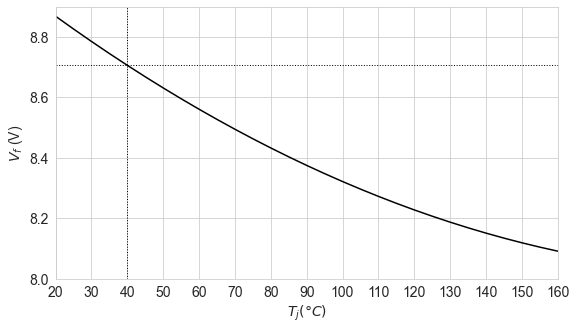

The R2 score for Vf is:  0.9110307155235589


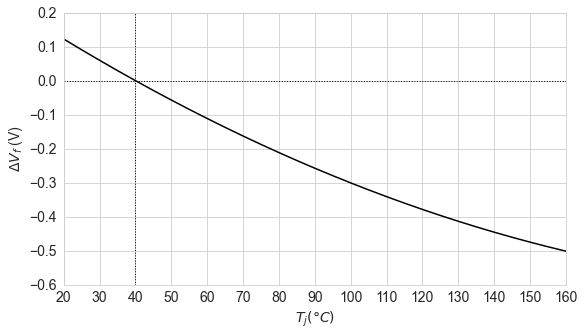

The R2 score for d_Vf is:  0.9966405485894597


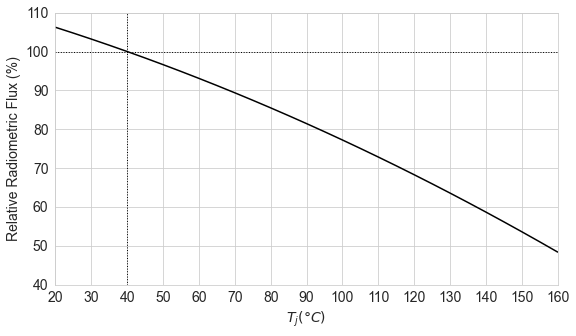

The R2 score for Radio is:  0.9990070572441493


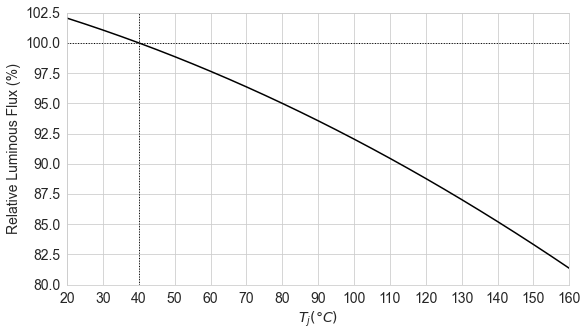

The R2 score for Lumin is:  0.9875203028191193


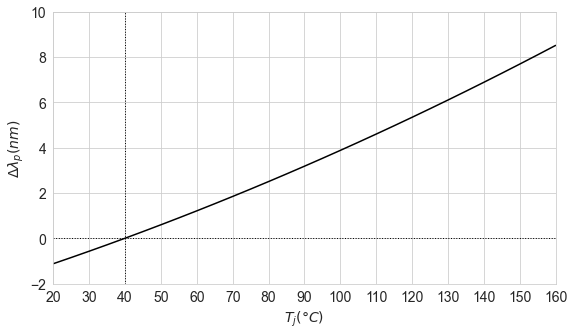

The R2 score for d_Lpk is:  0.9998343860806606


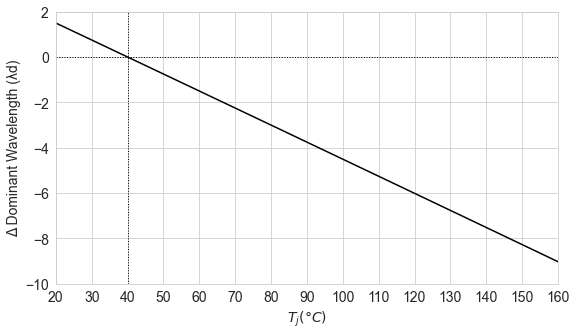

The R2 score for d_Ldom is:  0.9984960473372835


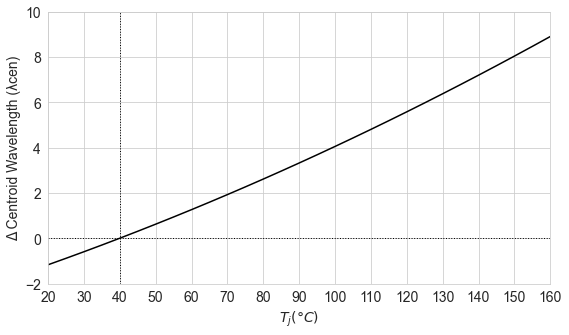

The R2 score for d_Lcen is:  0.9999973165835562


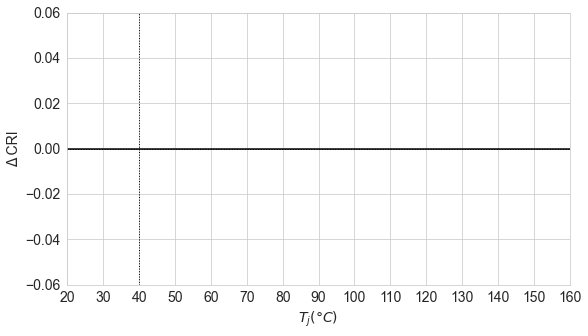

The R2 score for d_CRI is:  1.0


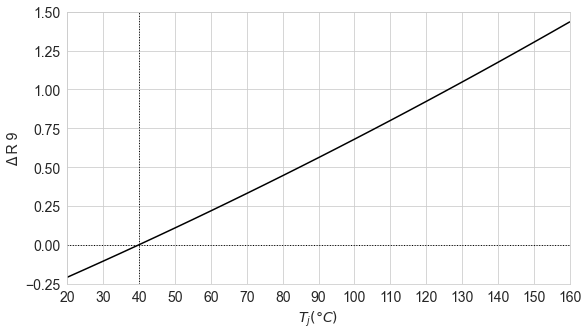

The R2 score for d_R9 is:  0.9234444863176027


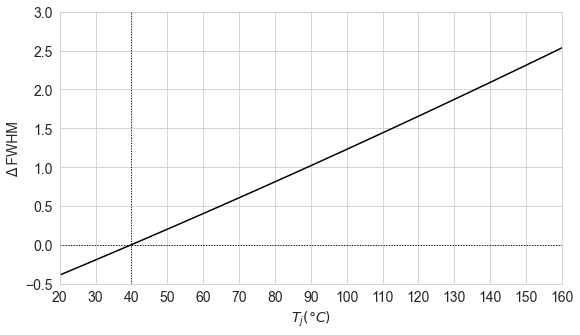

The R2 score for d_FWHM is:  0.9810666936439637


In [47]:
# Just Individual Thermal Graphs

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

test_therm = thermz.groupby([xt]).mean().reset_index()

index = thermz.index
condition = thermz[xt] == ref_temp
ref_ind = index[condition]

N = thermz[thermz.columns[0]].count()

sigma =np.ones(N)
sigma[[ref_ind[0]]] = 0.01

tn = int((((xt2-xt1)/10)*2)+1) # For therm get 20,25,etc

def f(x, *p):
    return np.poly1d(p)(x)

for (a,b,d,e) in zip(y_n, y_nt, ax_n, y_fn):
    x = thermz[xt]
    y = thermz[a]
    p1, _ = optimize.curve_fit(f, x, y, (0, 0, 0), sigma=sigma) # If want to change order, add more zeroes

    x2 = np.linspace(xt1, xt2, tn)
    y2 = np.poly1d(p1)(x2)
    plt.figure(figsize=(9,5))
    #plt.suptitle(b, fontweight = 'bold', fontsize = 14)
    if show_pt == True:
        plt.plot(x, y, "o")
    plt.plot(x2, f(x2, *p1), "black", label=u"Fixed point")
    plt.xlabel(xt)
    plt.ylabel(a)
    plt.xlim(xt1, xt2)
    plt.xticks(np.arange(xt1, xt2+0.01, t_bins))
    plt.axhline(thermz_m[a] ,ls='dotted', color='black', linewidth=1)
    plt.axvline(ref_temp, ls='dotted', color='black', linewidth=1);
    
    # Save each individual figure as pdf
    
    if over == False:
        if pulse_width == "None":
            fname = output_f + '/' + name + '_' + h + '_' + e + '_therm_'
            version_pdf(fname)
        else:
            fname = output_f + '/' + name + '_' + pulse_width + '_' + e + '_therm_'
            version_pdf(fname)
    else:
        if pulse_width == "None":
            plt.savefig(output_f + '/' + name + '_' + h + '_' + e + '_therm.pdf', dpi=1000, bbox_inches='tight')
        else:
            plt.savefig(output_f + '/' + name + '_' + pulse_width + '_' + e + '_therm.pdf', dpi=1000, bbox_inches='tight')
            
    plt.show()
    
    # R2 score calculations via sklearn lib
    result = np.where(np.in1d(x2, list(test_therm[xt])))
    y_t = np.array(test_therm[a])
    y_p = np.take(y2, result).flatten()
    #t = y_p[0]-y_p[-1]
    #if t < 0:
    #    yn = np.sort(yn) # sort descending for negative slope
    #else:
    #    yn = -np.sort(-yn) # sort ascending for positive slope
    r2 = r2_score(y_t, y_p) # calc r2
    print('The R2 score for', e, 'is: ' , r2);

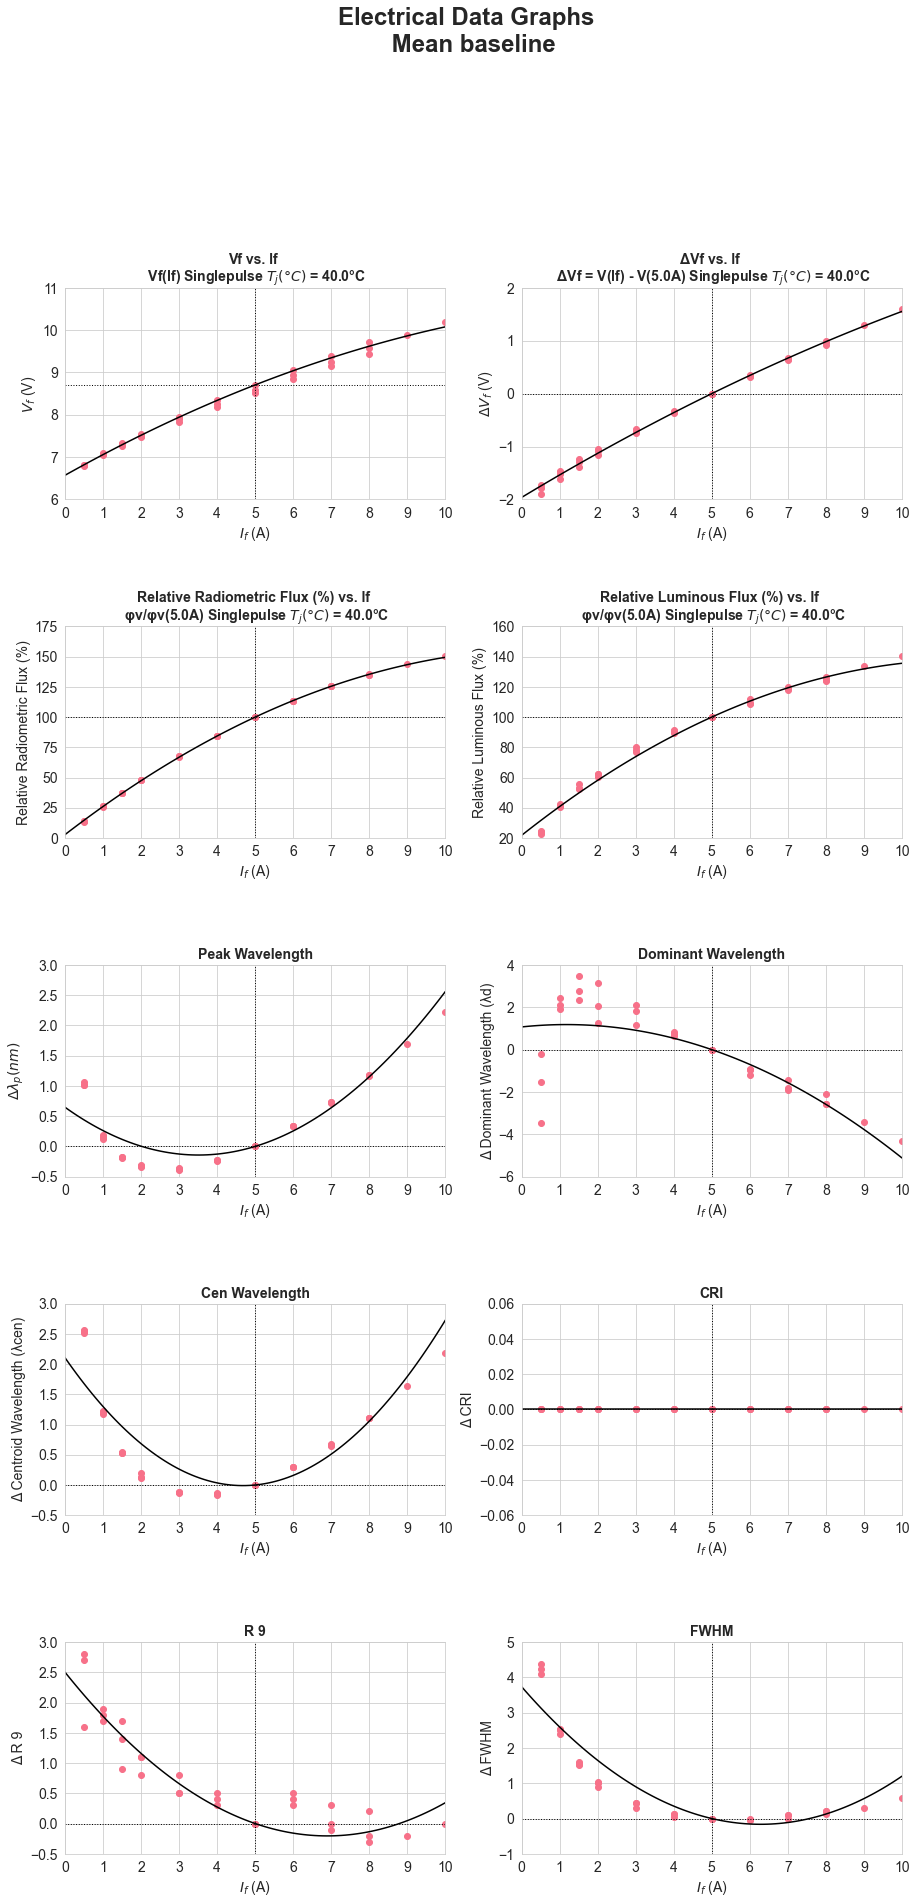

In [48]:
# Just Electrical

# To change font specifically - fontname = 'provide font name'
# To change font globally - plt.rcParams.update({'font.family':'sans-serif'})

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

sns.set_style("whitegrid")
f, axes = plt.subplots(row_size, column_size, figsize = (15,30))
plt.subplots_adjust(hspace = 0.6)
plt.subplots_adjust(top=0.85)
f.suptitle('Electrical Data Graphs \n Mean baseline', fontsize = 24, fontweight = 'bold')

index = electz.index
condition = electz[xc] == ref_current
ref_ind = index[condition]

N = electz[electz.columns[0]].count()

sigma =np.ones(N)
sigma[[ref_ind[0]]] = 0.01

def f(x, *p):
    return np.poly1d(p)(x)

for (a,b,d) in zip(y_n, y_ne, ax_n):
    x = electz[xc]
    y = electz[a]
    p1, _ = optimize.curve_fit(f, x, y, (0, 0, 0), sigma=sigma) # If want to change order, add more zeroes

    x2 = np.linspace(xe1, xe2, 100)
    y2 = np.poly1d(p1)(x2)
    axes[d].set_title(b, fontweight = 'bold', fontsize = 14)
    #if show_pt == True:
    axes[d].plot(x, y, "o")
    axes[d].plot(x2, f(x2, *p1), "black", label=u"Fixed point")
    axes[d].set(xlabel=xc, ylabel=a)
    axes[d].set(xlim=(xe1, xe2))
    axes[d].set(xticks=np.arange(xe1, xe2+0.01, e_bins))
    axes[d].axhline(electz_m[a] ,ls='dotted', color='black', linewidth=1)
    axes[d].axvline(ref_current, ls='dotted', color='black', linewidth=1)
# pass the figure to the custom window
#a = ScrollableWindow(f);

#plt.savefig(output_f + '/' + name + '_' + pulse_width + '_elect.png')

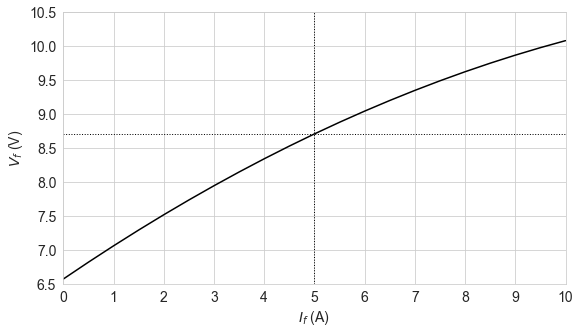

The R2 score for Vf is:  0.9962563919677672


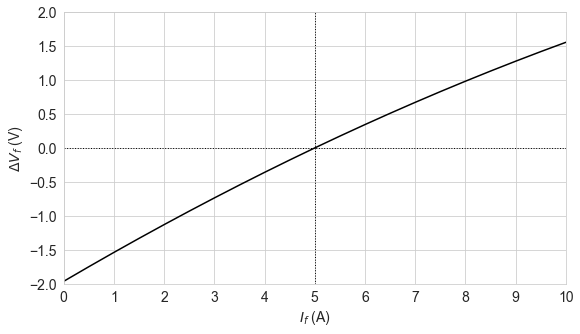

The R2 score for d_Vf is:  0.9994387364113003


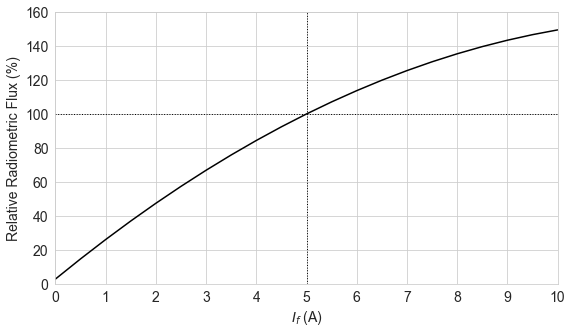

The R2 score for Radio is:  0.9998841471982517


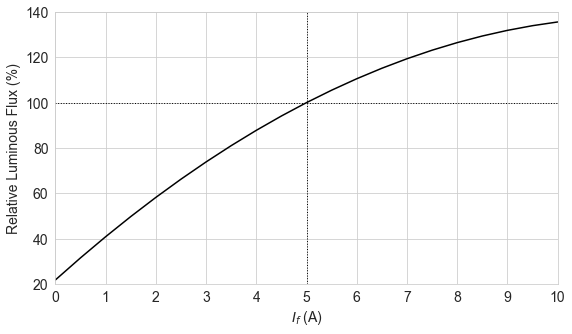

The R2 score for Lumin is:  0.990744325243683


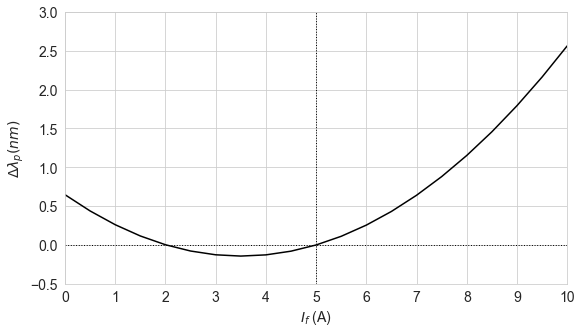

The R2 score for d_Lpk is:  0.9047571981903085


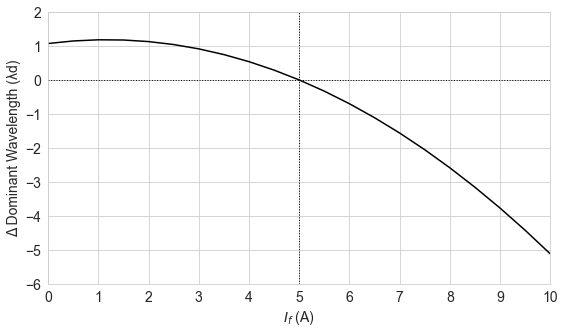

The R2 score for d_Ldom is:  0.7611735556680244


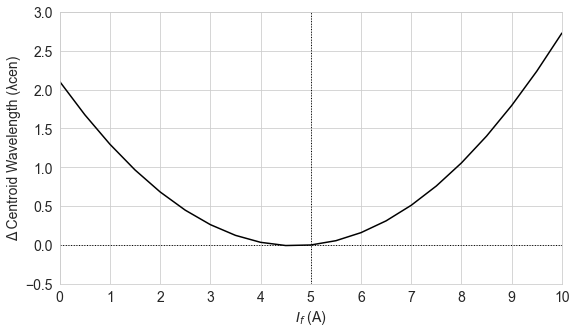

The R2 score for d_Lcen is:  0.8049211119571117


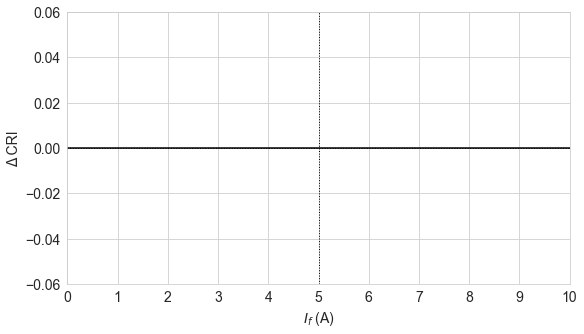

The R2 score for d_CRI is:  1.0


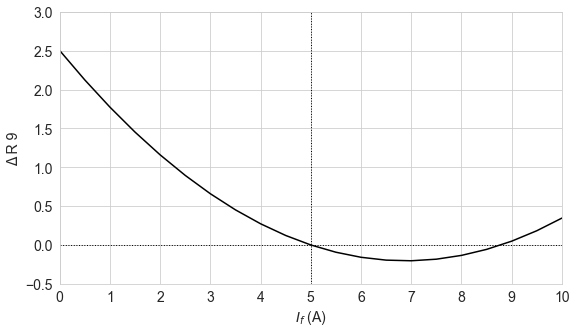

The R2 score for d_R9 is:  0.9079054538757397


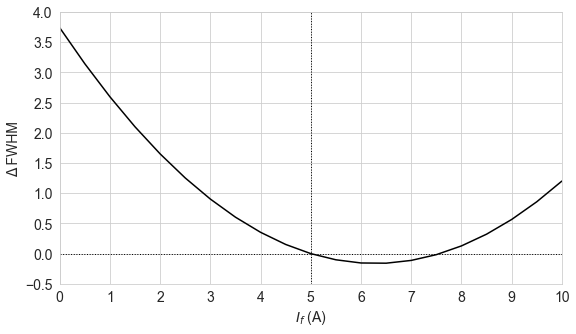

The R2 score for d_FWHM is:  0.848690617341969


In [49]:
# Just Individual Electrical Graphs

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

test_elect = electz.groupby([xc]).mean().reset_index()

index = electz.index
condition = electz[xc] == ref_current
ref_ind = index[condition]

N = electz[electz.columns[0]].count()

sigma =np.ones(N)
sigma[[ref_ind[0]]] = 0.01

en = int(((xe2-xe1)*2)+1) # For elect get 0, 1, 2 etc

def f(x, *p):
    return np.poly1d(p)(x)

for (a,b,d,e) in zip(y_n, y_ne, ax_n, y_fn):
    x = electz[xc]
    y = electz[a]
    p1, _ = optimize.curve_fit(f, x, y, (0, 0, 0), sigma=sigma) # If want to change order, add more zeroes

    x2 = np.linspace(xe1, xe2, en)
    y2 = np.poly1d(p1)(x2)
    plt.figure(figsize=(9,5))
    #plt.suptitle(b, fontweight = 'bold', fontsize = 14)
    if show_pt == True:
        plt.plot(x, y, "o")
    plt.plot(x2, f(x2, *p1), "black", label=u"Fixed point")
    plt.xlabel(xc)
    plt.ylabel(a)
    plt.xlim(xe1, xe2)
    plt.xticks(np.arange(xe1, xe2+0.01, e_bins))
    plt.axhline(electz_m[a] ,ls='dotted', color='black', linewidth=1)
    plt.axvline(ref_current, ls='dotted', color='black', linewidth=1);
     # Save each individual figure as pdf

    if over == False:
        if pulse_width == "None":
            fname = output_f + '/' + name + '_' + h + '_' + e + '_elect_'
            version_pdf(fname)
        else:
            fname = output_f + '/' + name + '_' + pulse_width + '_' + e + '_elect_'
            version_pdf(fname)
    else:
        if pulse_width == "None":
            plt.savefig(output_f + '/' + name + '_' + h + '_' + e + '_elect.pdf', dpi=1000, bbox_inches='tight')
        else:
            plt.savefig(output_f + '/' + name + '_' + pulse_width + '_' + e + '_elect.pdf', dpi=1000, bbox_inches='tight')
    plt.show()
    
    # R2 score calculations via sklearn lib
    result = np.where(np.in1d(x2, list(test_elect[xc])))
    y_t = np.array(test_elect[a])
    y_p = np.take(y2, result).flatten()
    #t = y_p[0]-y_p[-1]
    #if t < 0:
    #    yn = np.sort(yn) # sort descending for negative slope
    #else:
    #    yn = -np.sort(-yn) # sort ascending for positive slope
    r2 = r2_score(y_t, y_p) # calc r2
    print('The R2 score for', e, 'is: ' , r2);

In [50]:
# Pre-processing for chromaticity shift graph

# For colors and chromaticity shift - we must select certain columns and reorganize them

therm_pre = thermz[[cix, ciy, xt]]
elect_pre = electz[[cix, ciy, xc]]
#therm_df = pd.melt(therm_pre, id_vars=[xt], var_name='Legend', value_name='Δ CIEx, Δ CIEy')
#elect_df = pd.melt(elect_pre, id_vars=[xc], var_name='Legend', value_name='Δ CIEx, Δ CIEy')
#elect_df

In [51]:
# Set min & max to +-0.02
min_t = -0.02
max_t = 0.02

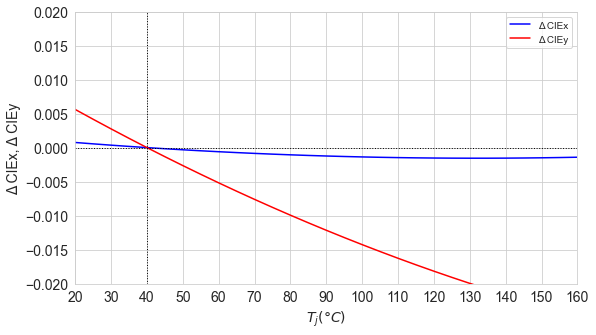

The R2 score for Δ CIEx is:  0.9522807508600551
The R2 score for Δ CIEy is:  0.9977970078754874


<Figure size 432x288 with 0 Axes>

In [52]:
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

index = therm_pre.index
condition = therm_pre[xt] == ref_temp
ref_ind = index[condition]

N = therm_pre[therm_pre.columns[0]].count()

sigma =np.ones(N)
sigma[[ref_ind[0]]] = 0.01

def f(x, *p):
    return np.poly1d(p)(x)

x = therm_pre[xt]
y = therm_pre[cix]
z = therm_pre[ciy]
p1, _ = optimize.curve_fit(f, x, y, (0, 0, 0), sigma=sigma) # If want to change order, add more zeroes
p2, _ = optimize.curve_fit(f, x, z, (0, 0, 0), sigma=sigma)

x2 = np.linspace(xt1, xt2, tn)
y2 = np.poly1d(p1)(x2)
z2 = np.poly1d(p2)(x2)
plt.figure(figsize=(9,5))
#plt.suptitle(b, fontweight = 'bold', fontsize = 14)
if show_pt == True:
    plt.plot(x, y, "o")
    plt.plot(x, z, "o")
plt.plot(x2, f(x2, *p1), "blue", label=cix) # Change color of CIEx line here
plt.plot(x2, f(x2, *p2), "red", label=ciy) # Change color of CIEy line here
plt.xlabel(xt)
plt.ylabel(cix + ', ' + ciy)
plt.xlim(xt1, xt2)
plt.xticks(np.arange(xt1, xt2+0.01, t_bins))
plt.ylim(min_t, max_t)
plt.yticks(np.arange(min_t, max_t+0.001, 0.005))
plt.axhline(thermz_m[a] ,ls='dotted', color='black', linewidth=1)
plt.axvline(ref_temp, ls='dotted', color='black', linewidth=1)
plt.legend(loc="best")
plt.show();

# Save the figure as pdf

if over == False:
    if pulse_width == "None":
        fname = output_f + '/' + name + '_' + h + '_' + cixn + '_' + ciyn + '_therm_'
        version_pdf(fname)
    else:
        fname = output_f + '/' + name + '_' + pulse_width + '_' + cixn + '_' + ciyn + '_therm_'
        version_pdf(fname)
else:
    if pulse_width == "None":
        plt.savefig(output_f + '/' + name + '_' + h + '_' + cixn + '_' + ciyn + '_therm.pdf', dpi=1000, bbox_inches='tight')
    else:
        plt.savefig(output_f + '/' + name + '_' + pulse_width + '_' + cixn + '_' + ciyn + '_therm.pdf', dpi=1000, bbox_inches='tight')
    
# R2 score calculations via sklearn lib
result = np.where(np.in1d(x2, list(test_therm[xt])))
y_t_x = np.array(test_therm[cix])
y_t_y = np.array(test_therm[ciy])
y_p_x = np.take(y2, result).flatten()
y_p_y = np.take(z2, result).flatten()
r2_x = r2_score(y_t_x, y_p_x) # calc r2 for CIEx
r2_y = r2_score(y_t_y, y_p_y) # calc r2 for CIEy
print('The R2 score for', cix, 'is: ' , r2_x)
print('The R2 score for', ciy, 'is: ' , r2_y);

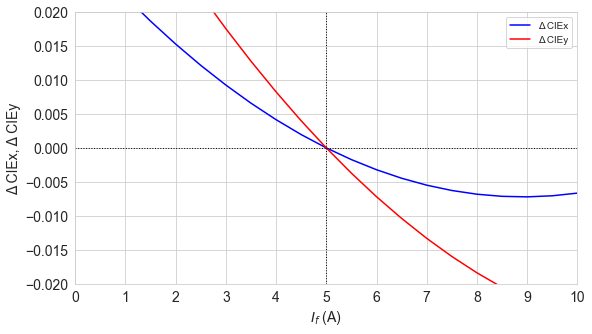

The R2 score for Δ CIEx is:  0.9926665111676023
The R2 score for Δ CIEy is:  0.9910387770694987


<Figure size 432x288 with 0 Axes>

In [53]:
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

index = elect_pre.index
condition = elect_pre[xc] == ref_current
ref_ind = index[condition]

N = elect_pre[elect_pre.columns[0]].count()

sigma =np.ones(N)
sigma[[ref_ind[0]]] = 0.01

def f(x, *p):
    return np.poly1d(p)(x)

x = elect_pre[xc]
y = elect_pre[cix]
z = elect_pre[ciy]
p1, _ = optimize.curve_fit(f, x, y, (0, 0, 0), sigma=sigma) # If want to change order, add more zeroes
p2, _ = optimize.curve_fit(f, x, z, (0, 0, 0), sigma=sigma)

x2 = np.linspace(xe1, xe2, en)
y2 = np.poly1d(p1)(x2)
z2 = np.poly1d(p2)(x2)
plt.figure(figsize=(9,5))
#plt.suptitle(b, fontweight = 'bold', fontsize = 14)
if show_pt == True:
    plt.plot(x, y, "o")
    plt.plot(x, z, "o")
plt.plot(x2, f(x2, *p1), "blue", label=cix) # Change color of CIEx line here
plt.plot(x2, f(x2, *p2), "red", label=ciy) # Change color of CIEy line here
plt.xlabel(xc)
plt.ylabel(cix + ', ' + ciy)
plt.xlim(xe1, xe2)
plt.xticks(np.arange(xe1, xe2+0.01, e_bins))
plt.ylim(min_t, max_t)
plt.yticks(np.arange(min_t, max_t+0.001, 0.005))
plt.axhline(electz_m[a] ,ls='dotted', color='black', linewidth=1)
plt.axvline(ref_current, ls='dotted', color='black', linewidth=1)
plt.legend(loc="best")
plt.show();

# Save the figure as pdf

if over == False:
    if pulse_width == "None":
        fname = output_f + '/' + name + '_' + h + '_' + cixn + '_' + ciyn + '_elect_'
        version_pdf(fname)
    else:
        fname = output_f + '/' + name + '_' + pulse_width + '_' + cixn + '_' + ciyn + '_elect_'
        version_pdf(fname)
else:
    if pulse_width == "None":
        plt.savefig(output_f + '/' + name + '_' + h + '_' + cixn + '_' + ciyn + '_elect.pdf', dpi=1000, bbox_inches='tight')
    else:
        plt.savefig(output_f + '/' + name + '_' + pulse_width + '_' + cixn + '_' + ciyn + '_elect.pdf', dpi=1000, bbox_inches='tight')

# R2 score calculations via sklearn lib
result = np.where(np.in1d(x2, list(test_elect[xc])))
y_t_x = np.array(test_elect[cix])
y_t_y = np.array(test_elect[ciy])
y_p_x = np.take(y2, result).flatten()
y_p_y = np.take(z2, result).flatten()
r2_x = r2_score(y_t_x, y_p_x) # calc r2 for CIEx
r2_y = r2_score(y_t_y, y_p_y) # calc r2 for CIEy
print('The R2 score for', cix, 'is: ' , r2_x)
print('The R2 score for', ciy, 'is: ' , r2_y);

In [54]:
# Create thermal data and electrical data summary
thermz_sum = thermz.groupby([xt]).mean().reset_index()
electz_sum = electz.groupby([xc]).mean().reset_index()

In [55]:
# Export as Excel Worksheet if needed

if exp == True:
    if pulse_width == "None":
        with pd.ExcelWriter(output_f + '/' + name + '_' + h + '_output.xlsx') as writer:  
            thermz.to_excel(writer, sheet_name='Thermal Data', index=False)
            thermz_sum.to_excel(writer, sheet_name='Thermal Data Summary', index=False)
            electz.to_excel(writer, sheet_name='Electrical Data', index=False)
            electz_sum.to_excel(writer, sheet_name='Electrical Data Summary', index=False)
    else:
        with pd.ExcelWriter(output_f + '/' + name + '_' + pulse_width + '_output.xlsx') as writer:  
            thermz.to_excel(writer, sheet_name='Thermal Data', index=False)
            thermz_sum.to_excel(writer, sheet_name='Thermal Data Summary', index=False)
            electz.to_excel(writer, sheet_name='Electrical Data', index=False)
            electz_sum.to_excel(writer, sheet_name='Electrical Data Summary', index=False)
else:
    pass

In [56]:
# Kills script so appendix doesn't run
sys.exit()

SystemExit: 

# Appendix

In [ ]:
'''

# For viewing a specific column

# Drop-down menu for viewing specific column's graphs

cols = list(therm.columns)
cols = cols[3:]

master = ThemedTk(theme='arc')
master.title("GUI")

ttk.Label(master, text = "Select & View a Specific Column", font=("Arial Bold", 12)).pack()

variable = StringVar(master)
variable.set(cols[0]) # default value

w = ttk.OptionMenu(master, variable, *cols)
w.pack()
    
def kill():
    global select
    select = variable.get()
    master.destroy()
    
ttk.Button(master, text = "OK", command = kill).pack()

master.mainloop()

''';

In [ ]:
#column = select

In [ ]:
'''

# Thermal

plt.figure(name + ' - Thermal Data for ' + column, clear=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
g = sns.lineplot(x = xt, y = column, hue = "Serial Number", data = therm, ci=False)

g.axhline(therm[column]['mean'] ,ls='dotted', color='black', linewidth=1)
g.axvline(ref_temp, ls='dotted', color='black', linewidth=1)
g.legend(loc='right', bbox_to_anchor=(1.13, 0.5), ncol=1).set_title('Serial Number')
g.set(xlim=(xt1,xt2))
g.set(xticks=np.arange(xt1, xt2+0.01, t_bins))

plt.title(str(column) + ' vs. Tj \n By Serial Number - ' + str(pulse_width).title() + ' lf = ' + str(set_current) + 'A', 
                    fontweight = 'bold')
                    
''';

In [ ]:
'''

# Electrical

plt.figure(name + ' - Electrical Data for ' + column, clear=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
g = sns.lineplot(x = xc, y = column, hue = "Serial Number", data = elect, ci=False)

g.axhline(elect[column]['mean'] ,ls='dotted', color='black', linewidth=1)
g.axvline(ref_current, ls='dotted', color='black', linewidth=1)
g.legend(loc='right', bbox_to_anchor=(1.13, 0.5), ncol=1).set_title('Serial Number')
g.set(xlim=(xe1,xe2))
g.set(xticks=np.arange(xe1, xe2+0.01, e_bins))

plt.title(str(column) + ' vs. lf \n By Serial Number - ' + str(pulse_width).title() + ' Tj = ' + str(set_temp) + '°C', 
                    fontweight = 'bold')
                    
''';

In [ ]:
# How to setup graph with zero given high weight
'''
index = electz.index
condition = electz[xc] == ref_current
ref_ind = index[condition]

x = electz[xc]
y = electz[y6]
N = electz[electz.columns[0]].count()

sigma =np.ones(N)
sigma[[ref_ind[0]]] = 0.01

def f(x, *p):
    return np.poly1d(p)(x)

p1, _ = optimize.curve_fit(f, x, y, (0, 0, 0), sigma=sigma) # If want to change order, add more zeroes

x2 = np.linspace(xe1, xe2, 100)
y2 = np.poly1d(p)(x2)
plt.plot(x, y, "o")
plt.plot(x2, f(x2, *p1), "black", label=u"Fixed point")
plt.legend(loc="best")
#plt.plot.set_size_inches(8.5, 4)
plt.axhline(electz_m[y6] ,ls='dotted', color='black', linewidth=1)
plt.axvline(ref_current, ls='dotted', color='black', linewidth=1);
# Dominant Wavelength
''';